# Morphology

We now explore the possibility of applying Erosion and Dilation on encrypted image, showcasing that minor adjustments to our scheme can extend its reach to non-linear operations

In [1]:
from utils_encryptedDomain.homomorphic_operations import *
from utils_plaintextDomain.utils import *
# Show the figures / plots inside the notebook
%matplotlib inline

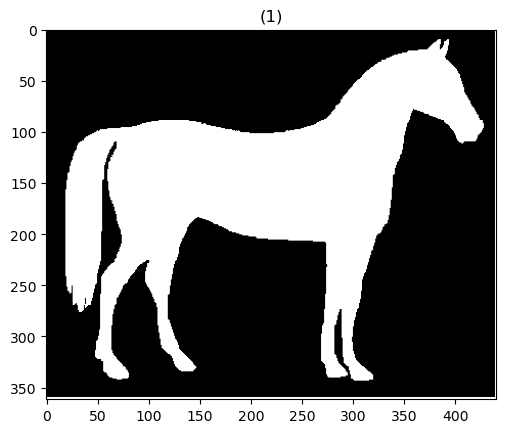

In [4]:
# Preparing the test image
horse = io.imread("images/horse.jpg")
grayscale_horse = (rgb2gray(horse) * 255).astype(np.int64)
grayscale_horse[grayscale_horse < 100] = 0
grayscale_horse[grayscale_horse >= 100] = 255

show_images([grayscale_horse])

## Erosion

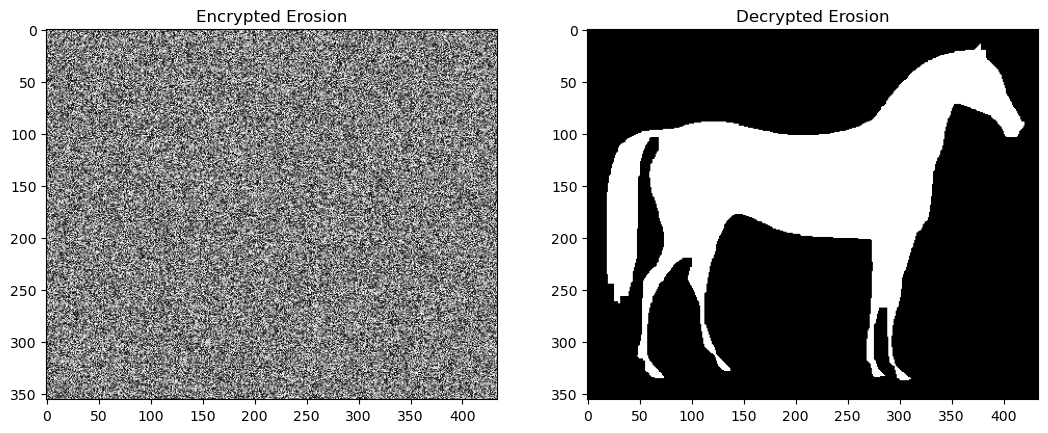

In [5]:
encryptedHorse = encryptImage(grayscale_horse)
# Normal Convolution
testKernel = np.array([[1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1]]).astype(np.int64)
#paddedGrayscaleCUFE = replicate_border(grayscale_cufe, 20, 20, 20, 20)
encryptedOutput = encryptedConvolve2D(encryptedHorse, testKernel)
decryptedOutput = decryptImage(encryptedOutput)
decryptedOutput[decryptedOutput != 255*49] = 0
decryptedOutput[decryptedOutput == 255*49] = 255

show_images([encryptedOutput, decryptedOutput], ["Encrypted Erosion", "Decrypted Erosion"])

## Dilation

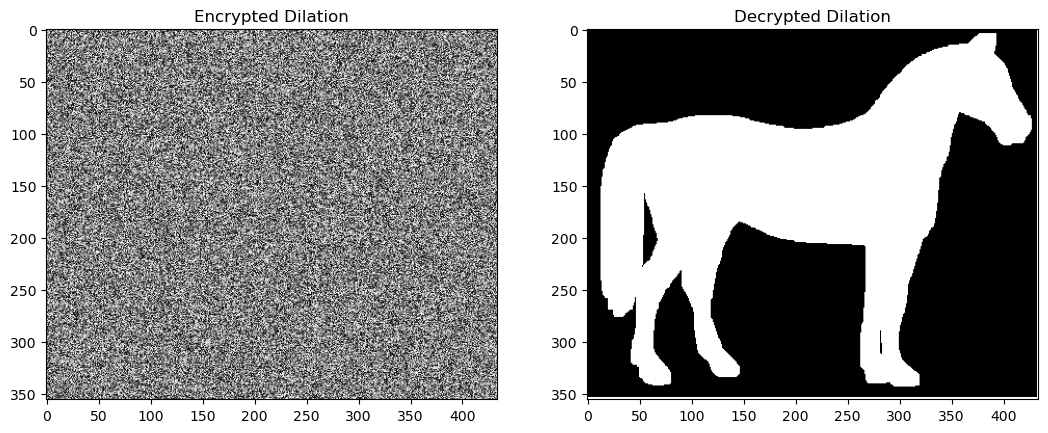

In [6]:
# Normal Convolution
testKernel = np.array([[1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1], 
                       [1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1]]).astype(np.int64)
#paddedGrayscaleCUFE = replicate_border(grayscale_cufe, 20, 20, 20, 20)
encryptedOutput = encryptedConvolve2D(encryptedHorse, testKernel)
decryptedOutput = decryptImage(encryptedOutput)
decryptedOutput[decryptedOutput != 0] = 255

show_images([encryptedOutput, decryptedOutput], ["Encrypted Dilation", "Decrypted Dilation"])

As such, our encrypted operations now involve morphological operations!